<a href="https://colab.research.google.com/github/shelestmariia/Online-Store-Exploratory-Data-Analysis/blob/main/Sales_analytics_of_an_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade google-cloud-bigquery
from google.colab import auth
from google.cloud import bigquery
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
auth.authenticate_user()
client = bigquery.Client(project="data-analytics-mate")

In [ ]:
query = """
SELECT
  s.date AS order_date,
  s.ga_session_id AS session_id,
  sp.continent,
  sp.country,
  sp.device,
  sp.browser,
  sp.mobile_model_name,
  sp.operating_system,
  sp.language,
  sp.name AS traffic_source_information,
  sp.channel AS traffic_channel,
  a.id AS user_id,
  a.is_verified,
  a.is_unsubscribed,
  p.category,
  p.name AS product_name,
  p.price,
  p.short_description
FROM `data-analytics-mate.DA.session` AS s
LEFT JOIN `DA.session_params` AS sp
  ON s.ga_session_id = sp.ga_session_id
LEFT JOIN `DA.order` AS o
  ON s.ga_session_id = o.ga_session_id
LEFT JOIN `DA.account_session` AS acs
  ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.account` AS a
  ON acs.account_id = a.id
LEFT JOIN `DA.product` AS p
  ON o.item_id = p.item_id
"""

In [ ]:
query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()
df.head()

,order_date,session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_source_information,traffic_channel,user_id,is_verified,is_unsubscribed,category,product_name,price,short_description
0,2020-11-01,5760483956,Americas,United States,desktop,Chrome,Safari,Macintosh,zh,<Other>,Paid Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,7115337200,Europe,United Kingdom,desktop,Chrome,Chrome,Web,en-us,(organic),Organic Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3978035233,Europe,Norway,mobile,Chrome,<Other>,Web,zh,(direct),Direct,<NA>,<NA>,<NA>,Tables & desks,RÅSKOG,189.0,"Trolley, 35x45x78 cm"
3,2020-11-01,9648986282,Africa,Nigeria,mobile,Chrome,<Other>,Android,es-es,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
4,2020-11-01,4393441533,Asia,China,desktop,Chrome,Chrome,Windows,en-us,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"


In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"], format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_date                  349545 non-null  datetime64[ns]
 1   session_id                  349545 non-null  Int64         
 2   continent                   349545 non-null  object        
 3   country                     349545 non-null  object        
 4   device                      349545 non-null  object        
 5   browser                     349545 non-null  object        
 6   mobile_model_name           349545 non-null  object        
 7   operating_system            349545 non-null  object        
 8   language                    235279 non-null  object        
 9   traffic_source_information  349545 non-null  object        
 10  traffic_channel             349545 non-null  object        
 11  user_id                     27945 non-n

In [ ]:
df.describe()

,order_date,session_id,user_id,is_verified,is_unsubscribed,price
count,349545,349545.0,27945.0,27945.0,27945.0,33538.000000
mean,2020-12-16 12:42:00.602497536,4992250296.631739,659005.065557,0.71698,0.16944,953.298679
min,2020-11-01 00:00:00,1205.0,636133.0,0.0,0.0,3.000000
25%,2020-11-26 00:00:00,2493646855.0,647576.0,0.0,0.0,170.000000
50%,2020-12-15 00:00:00,4988476074.0,658952.0,1.0,0.0,445.000000
75%,2021-01-08 00:00:00,7491286508.0,670414.0,1.0,0.0,1195.000000
max,2021-01-31 00:00:00,9999997129.0,681962.0,1.0,1.0,9585.000000
std,NaN,2887450949.537772,13216.529465,0.450474,0.375147,1317.001775


In [ ]:
df.isna().sum()

,0
order_date,0
session_id,0
continent,0
country,0
device,0
browser,0
mobile_model_name,0
operating_system,0
language,114266
traffic_source_information,0


#**Description of the dataset**

* total number of columns: 18
* number of numerical columns: 5 ("session_id", "user_id", "is_verified", "is_unsubscribed", "price")
* number of categorical columns: 12 ("continent", "country", "device", "browser", "mobile_model_name", "operating_system", "language", "traffic_sourse_information", "traffic_channel", "category", "product_name", "short_description")
* number of datetime columns:1 ("order_date")
* number of unique sessions: 349545
* time period covered: from 2020-11-01 to 2021-01-31
* missing values in columns: "language", "user_id", "is_verified", "is_unsubscribed", "category", "product_name", "price", "short_description"
* the information in these columns is missing because the data depends on user actions (registration, subscription), not all sessions provide technical parameters (such as language), and not all sessions result in product purchases.



#**Variables:**
* *"order_date"* – the date when the order was placed

* *"session_id"* – unique identifier of the user session

* *"continent"* – continent from which the user accessed the website

* *"country"* – user’s country

* *"device"* – type of device used

* *"browser"* – web browser used during the session

* *"mobile_model_name"* – specific model of the mobile device

* *"operating_system"* – operating system of the device

* *"language"* – browser language setting

* *"traffic_source_information"* – detailed information about where the user came from

* *"traffic_channel"* – marketing channel

* *"user_id"* – unique ID of the registered user

* *"is_verified"* – whether the user has verified their email

* *"is_unsubscribed"* – whether the user has unsubscribed from email communications

* *"category"* – product category

* *"product_name"* – name of the product

* *"price"* – product price

* *"short_description"* – brief description of the product

# **Data analysis and visualization**

Top 10 Product Categories by Total Sales
                           category      price
0                 Sofas & armchairs  8388254.5
1                            Chairs  6147748.8
2                              Beds  4919725.0
3        Bookcases & shelving units  3640818.1
4              Cabinets & cupboards  2336499.5
5                 Outdoor furniture  2142222.2
6                    Tables & desks  1790307.5
7  Chests of drawers & drawer units   906562.5
8                     Bar furniture   735503.0
9              Children's furniture   467697.0


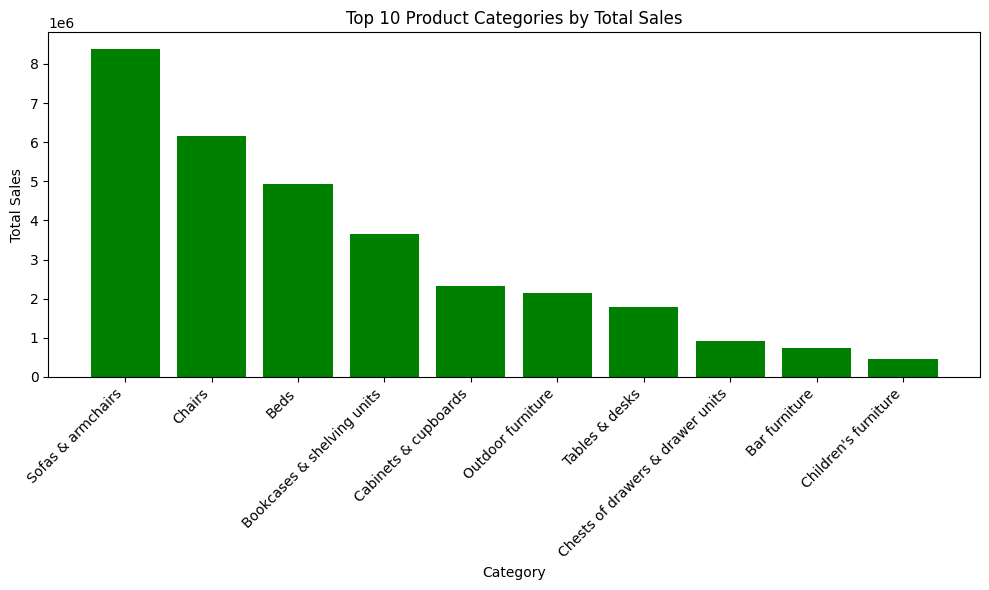

In [ ]:
# top 10 product categories for total sales
top_categories = (
    df.groupby("category")["price"]
      .sum()
      .sort_values(ascending=False)
      .head(10).reset_index())
print(f"Top 10 Product Categories by Total Sales\n{top_categories}")

plt.figure(figsize=(10,6))
plt.bar(top_categories["category"], top_categories["price"], color = "green")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Product Categories by Total Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


    device       price  percent_of_total
0  desktop  18864039.0         59.002245
1   mobile  12384225.8         38.734924
2   tablet    723466.3          2.262831


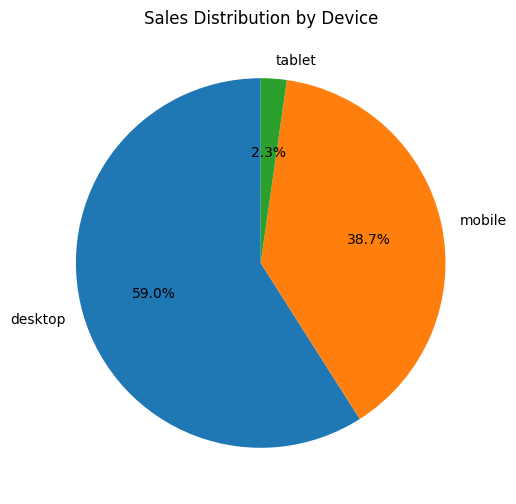

In [ ]:
# Sales analysis by device type (% of total sales)
total_sales = df["price"].sum()
device_sales = (df.groupby("device")["price"].sum().reset_index())
device_sales["percent_of_total"] = (device_sales["price"] / total_sales * 100)
print(device_sales)

plt.figure(figsize=(6,6))
plt.pie(
    device_sales["price"],
    labels=device_sales["device"],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Sales Distribution by Device")
plt.show()

In [ ]:
# Sales analysis by device model (% of total sales)
model_sales = (df.groupby("mobile_model_name")["price"].sum().reset_index().sort_values("price", ascending=False))
model_sales["percent_of_total"] = (model_sales["price"] / total_sales * 100)
print(model_sales)


  mobile_model_name      price  percent_of_total
1            Chrome  8899523.9         27.835602
0           <Other>  6535330.8         20.440966
7            Safari  6491062.1         20.302504
9            iPhone  6420776.3         20.082667
2        ChromeBook  1830458.7          5.725241
3              Edge   697222.3          2.180746
8              iPad   448854.2          1.403910
4           Firefox   421066.9          1.316998
6        Pixel 4 XL   118287.7          0.369976
5           Pixel 3   109148.2          0.341390


In [ ]:
# Top 3 continents by sales
top_continents_sales = (df.groupby("continent")["price"].sum().sort_values(ascending=False).head(3).reset_index())
print(f"Top 3 continents by sales \n {top_continents_sales}")
# Top 3 continents by number of orders
top_continents_orders = (df.groupby("continent")["price"].count().sort_values(ascending=False).head(3).reset_index()
.rename(columns={"price": "number_of_orders"}))
print(f"Top 3 continents by number of orders \n {top_continents_orders}")

Top 3 continents by sales 
   continent       price
0  Americas  17665280.0
1      Asia   7601298.3
2    Europe   5934624.2
Top 3 continents by number of orders 
   continent  number_of_orders
0  Americas             18553
1      Asia              7950
2    Europe              6261


In [ ]:
#Top 5 countries by sales
top_countries_sales = (df.groupby("country")["price"].sum().sort_values(ascending=False).head(5).reset_index())
print(f"Top 5 countries by sales \n {top_countries_sales}")
#Top 5 countries by number of orders
top_countries_orders = (df.groupby("country")["price"].count().sort_values(ascending=False).head(3).reset_index()
.rename(columns={"price": "number_of_orders"}))
print(f"Top 5 countries by number of orders \n {top_countries_orders}")

Top 5 countries by sales 
           country       price
0   United States  13943553.9
1           India   2809762.0
2          Canada   2437921.0
3  United Kingdom    938317.9
4          France    710692.8
Top 5 countries by number of orders 
          country  number_of_orders
0  United States             14673
1          India              3029
2         Canada              2560


 Top 10 countries with the most registered users 
          country  user_id
0   United States    12384
1           India     2687
2          Canada     2067
3  United Kingdom      859
4          France      553
5           Spain      536
6          Taiwan      500
7           China      490
8         Germany      490
9           Italy      386


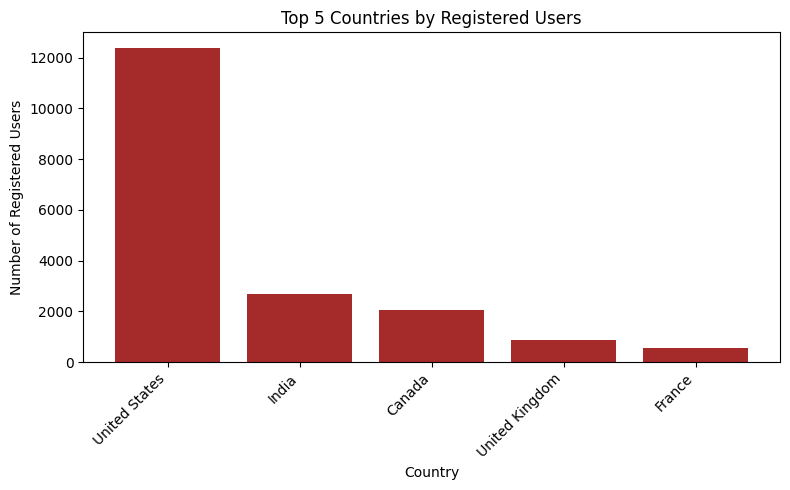

In [ ]:
#Top 10 countries with the most registered users
registered_users = df.dropna(subset=["user_id"])
top_countries_registered = (registered_users.groupby("country")["user_id"].nunique().sort_values(ascending=False).head(10).reset_index())
print(f" Top 10 countries with the most registered users \n{top_countries_registered}")

#Top 5 countries with the most registered users
top_countries_registered = top_countries_registered.head(5)
plt.figure(figsize=(8,5))
plt.bar(top_countries_registered["country"], top_countries_registered["user_id"], color = "brown")
plt.xlabel("Country")
plt.ylabel("Number of Registered Users")
plt.title("Top 5 Countries by Registered Users")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

   order_date     sales
0  2020-11-01  244292.5
1  2020-11-02  355506.8
2  2020-11-03  498979.6
3  2020-11-04  339187.1
4  2020-11-05  391276.6
..        ...       ...
87 2021-01-27  286340.7
88 2021-01-28       0.0
89 2021-01-29       0.0
90 2021-01-30       0.0
91 2021-01-31       0.0

[92 rows x 2 columns]


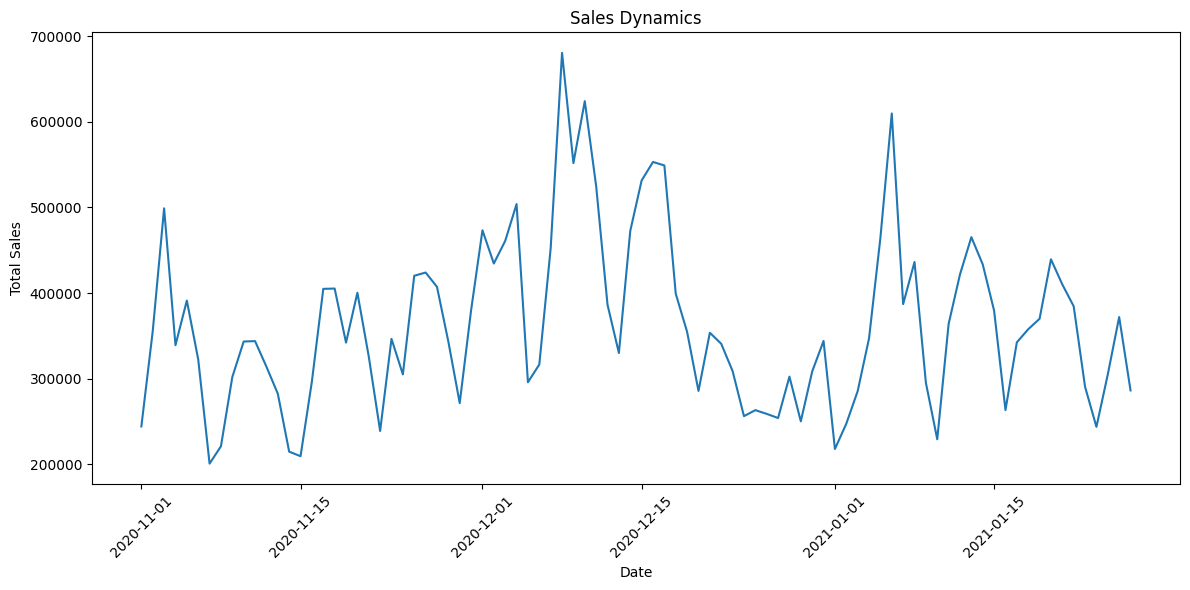

In [ ]:
#Sales Dynamics
daily_sales = df.groupby("order_date")["price"].sum().reset_index().rename(columns={"price": "sales"})
print(daily_sales)

daily_sales = daily_sales[daily_sales["sales"] != 0]

plt.figure(figsize=(12, 6))
plt.plot(daily_sales["order_date"], daily_sales["sales"])
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Dynamics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the analysis of sales dynamics, there are peak values ​​that characterize the seasonality of sales.

     weekday      sales
0     Monday  4636290.4
1    Tuesday  5457515.9
2  Wednesday  5466542.9
3   Thursday  4936935.6
4     Friday  4523067.2
5   Saturday  3477990.9
6     Sunday  3473388.2


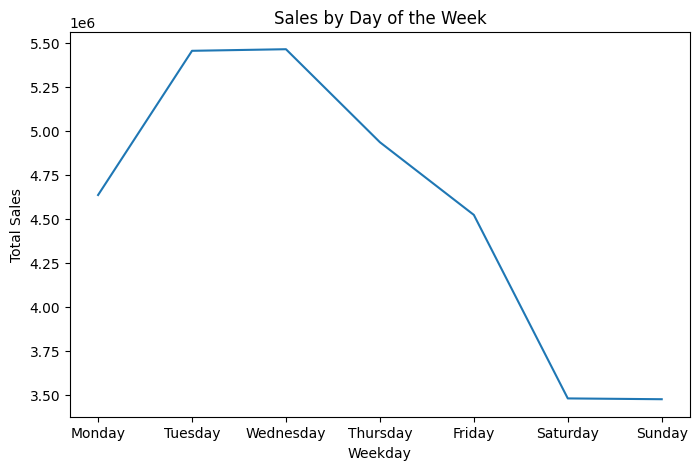

In [ ]:
daily_sales["weekday"] = daily_sales["order_date"].dt.day_name()

weekday_sales = daily_sales.groupby("weekday")["sales"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).reset_index()
print(weekday_sales)
plt.figure(figsize=(8,5))
plt.plot(weekday_sales['weekday'], weekday_sales['sales'])
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.title("Sales by Day of the Week")
plt.show()

Based on the analysis of sales by weekday, weekly seasonality is observed: sales consistently peak on weekdays rather than weekends. This may indicate that users are more active or more likely to make purchases during working days, possibly due to professional usage patterns or weekday promotions.

    order_date traffic_channel    sales
0   2020-11-01          Direct  54669.5
1   2020-11-01  Organic Search  95112.0
2   2020-11-01     Paid Search  64688.0
3   2020-11-01   Social Search  25078.0
4   2020-11-01       Undefined   4745.0
..         ...             ...      ...
455 2021-01-31          Direct      0.0
456 2021-01-31  Organic Search      0.0
457 2021-01-31     Paid Search      0.0
458 2021-01-31   Social Search      0.0
459 2021-01-31       Undefined      0.0

[460 rows x 3 columns]


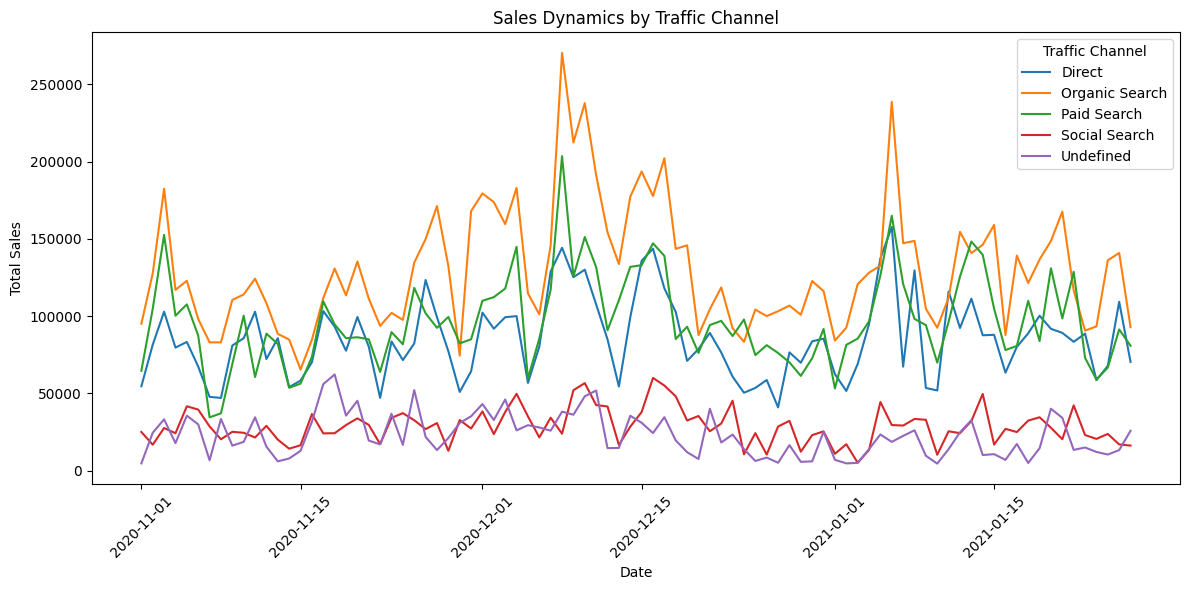

In [ ]:
channel_sales = df.groupby(["order_date", "traffic_channel"])["price"].sum().reset_index().rename(columns={"price": "sales"})
print(channel_sales)
channel_sales = channel_sales[channel_sales["sales"] != 0]
channels = channel_sales['traffic_channel'].unique()

plt.figure(figsize=(12,6))
sns.lineplot(data=channel_sales, x="order_date", y="sales", hue="traffic_channel")

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Dynamics by Traffic Channel")
plt.xticks(rotation=45)
plt.legend(title="Traffic Channel")
plt.tight_layout()
plt.show()

Most often, sales were made through such traffic channels as: Organic Search, Paid Search and Direct. Peak values were observed in December, likely due to the approaching Christmas holidays.

In [ ]:
# number of sessions by traffic channels and device types
pivot_table = pd.pivot_table(
    df,
    index="traffic_channel",
    columns="device",
    values="session_id",
    aggfunc="nunique",
    fill_value=0)
print(pivot_table)

device           desktop  mobile  tablet
traffic_channel                         
Direct             47825   31745    1812
Organic Search     72622   49014    2789
Paid Search        55167   37034    2140
Social Search      16288   10988     638
Undefined          12527    8486     470


In [ ]:
#total sales by product category (top 10 categories) in different countries (top 5 countries)
top_countries = (df.groupby("country")["price"].sum().sort_values(ascending=False).head(5).index)
df_top_countries = df[df["country"].isin(top_countries)]
top_categories = (df_top_countries.groupby("category")["price"].sum().sort_values(ascending=False).head(10).index)
df_top = df_top_countries[df_top_countries["category"].isin(top_categories)]
pivot_table = pd.pivot_table(df_top, index="category", columns="country", values="price", aggfunc="sum", fill_value=0)
print(pivot_table)

country                             Canada    France     India  \
category                                                         
Bar furniture                      51724.0   11199.0   57657.0   
Beds                              354772.0  116414.0  358319.5   
Bookcases & shelving units        278981.9   73830.0  364507.4   
Cabinets & cupboards              181802.0   59101.5  191888.0   
Chairs                            417740.8  134029.4  544309.2   
Chests of drawers & drawer units   71952.0   21544.5   73111.0   
Children's furniture               30264.0   14258.0   39177.0   
Outdoor furniture                 185322.8   40486.4  162289.4   
Sofas & armchairs                 692427.5  187735.0  788430.0   
Tables & desks                    132678.0   42299.0  186157.5   

country                           United Kingdom  United States  
category                                                         
Bar furniture                            22103.0       330805.0  
Beds     

In [ ]:
# analysis of the behavior of registered and signed-in users
registered_users = df.dropna(subset=["user_id"])
pivot_table = pd.pivot_table(
    registered_users,
    index=["is_verified", "is_unsubscribed"],
    values=["user_id", "price"],
    aggfunc={"user_id": "nunique", "price": "sum"},
    fill_value=0)
pivot_table = pivot_table.rename(columns={"user_id": "unique_users", "price": "total_sales"})
print(pivot_table)

                             total_sales  unique_users
is_verified is_unsubscribed                           
0           0                   682461.1          7478
            1                    34040.0           431
1           0                  1468335.8         15732
            1                   397681.6          4304


#Statistical analysis of relationships

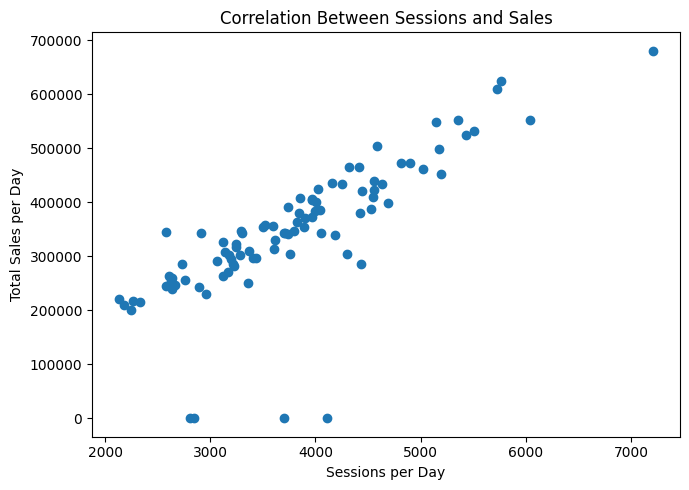


Conclusion:
- Correlation coefficient: 0.7910809164540891
- P-value: 6.483532312080735e-21 → STATISTICALLY SIGNIFICANT


In [ ]:
# relationship between sessions and total sales
from scipy.stats import pearsonr

daily_metrics = df.groupby("order_date").agg(sessions=("session_id", "nunique"), total_sales=("price", "sum")).reset_index()

#  Visualization: relationship between sessions & sales
plt.figure(figsize=(7,5))
plt.scatter(daily_metrics["sessions"], daily_metrics["total_sales"])
plt.xlabel("Sessions per Day")
plt.ylabel("Total Sales per Day")
plt.title("Correlation Between Sessions and Sales")
plt.tight_layout()
plt.show()

#Correlation
corr_coef, p_value = pearsonr(daily_metrics["sessions"], daily_metrics["total_sales"])

if p_value < 0.05:
    significance = "STATISTICALLY SIGNIFICANT"
else:
    significance = "NOT statistically significant"
print(f"\nConclusion:")
print(f"- Correlation coefficient: {corr_coef}")
print(f"- P-value: {p_value} → {significance}")

In [ ]:
# relationship of sales across different traffic channels
daily = (df.groupby(["order_date", "traffic_channel"])["price"].sum().reset_index())
pivot = daily.pivot(index="order_date", columns="traffic_channel",values="price")
print(pivot.head())

results = []
for i in range(len(channels)):
    for j in range(i + 1, len(channels)):
        ch1 = channels[i]
        ch2 = channels[j]

        corr, p = pearsonr(pivot[ch1], pivot[ch2])
        results.append([ch1, ch2, corr, p])

correlation_df = pd.DataFrame(results, columns=["channel_1", "channel_2", "pearson_corr", "p_value"])

display(correlation_df)
print("\nConclusions:")

for _, row in correlation_df.iterrows():
    corr = row["pearson_corr"]
    p = row["p_value"]

    sig = "STATISTICALLY SIGNIFICANT" if p < 0.05 else "NOT statistically significant"

    print(f"- {row['channel_1']} ↔ {row["channel_2"]}: "
        f"correlation = {corr}, p = {p} → {sig} connection")

traffic_channel    Direct  Organic Search  Paid Search  Social Search  \
order_date                                                              
2020-11-01        54669.5         95112.0      64688.0        25078.0   
2020-11-02        81561.5        127746.5     104780.8        16843.0   
2020-11-03       102909.5        182521.9     152641.3        27652.5   
2020-11-04        79683.6        117067.1     100332.0        24257.4   
2020-11-05        83367.6        122938.4     107648.0        41693.2   

traffic_channel  Undefined  
order_date                  
2020-11-01          4745.0  
2020-11-02         24575.0  
2020-11-03         33254.4  
2020-11-04         17847.0  
2020-11-05         35629.4  


,channel_1,channel_2,pearson_corr,p_value
0,Direct,Organic Search,0.837833,2.190420e-25
1,Direct,Paid Search,0.814072,5.896435e-23
2,Direct,Social Search,0.604060,1.831889e-10
3,Direct,Undefined,0.517505,1.275436e-07
4,Organic Search,Paid Search,0.870086,2.142003e-29
5,Organic Search,Social Search,0.583117,1.066192e-09
6,Organic Search,Undefined,0.526068,7.228214e-08
7,Paid Search,Social Search,0.596428,3.532284e-10
8,Paid Search,Undefined,0.521961,9.509609e-08
9,Social Search,Undefined,0.455126,5.161928e-06



Conclusions:
- Direct ↔ Organic Search: correlation = 0.8378332649310187, p = 2.1904196603645366e-25 → STATISTICALLY SIGNIFICANT connection
- Direct ↔ Paid Search: correlation = 0.8140715620898857, p = 5.896434878977516e-23 → STATISTICALLY SIGNIFICANT connection
- Direct ↔ Social Search: correlation = 0.6040603909721839, p = 1.831889246946262e-10 → STATISTICALLY SIGNIFICANT connection
- Direct ↔ Undefined: correlation = 0.5175046692734796, p = 1.2754357002002653e-07 → STATISTICALLY SIGNIFICANT connection
- Organic Search ↔ Paid Search: correlation = 0.870086120900533, p = 2.1420029219324783e-29 → STATISTICALLY SIGNIFICANT connection
- Organic Search ↔ Social Search: correlation = 0.5831173516286681, p = 1.0661924301883206e-09 → STATISTICALLY SIGNIFICANT connection
- Organic Search ↔ Undefined: correlation = 0.5260682168174377, p = 7.228214166055068e-08 → STATISTICALLY SIGNIFICANT connection
- Paid Search ↔ Social Search: correlation = 0.5964277768036558, p = 3.5322844619049755e-10 → S

,price,sales_count
0,3.0,22
1,5.0,63
2,5.6,17
3,6.0,34
4,9.0,63


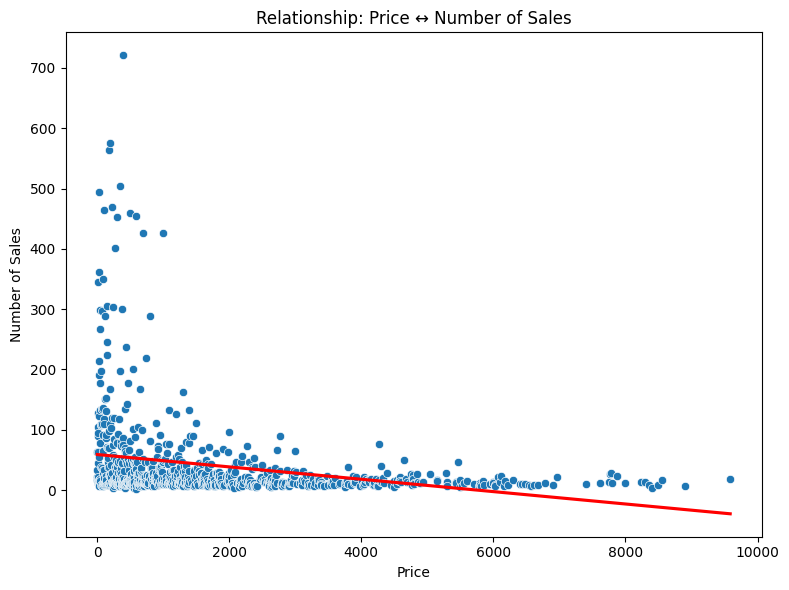

Pearson correlation: 0.45512593283126834
P-value: 2.5302537233304666e-13
The relationship is statistically significant


In [ ]:
# relationship between the price of a product and the number of sales
price_counts = df.groupby("price")["product_name"].count().reset_index()
price_counts.rename(columns={"product_name": "sales_count"}, inplace=True)

display(price_counts.head())

plt.figure(figsize=(8,6))
sns.scatterplot(x="price", y="sales_count", data=price_counts)
sns.regplot(x="price", y="sales_count", data=price_counts, scatter=False, ci=None, color="red")

plt.xlabel("Price")
plt.ylabel("Number of Sales")
plt.title("Relationship: Price ↔ Number of Sales")
plt.tight_layout()
plt.show()
orr, p_value = pearsonr(price_counts["price"], price_counts["sales_count"])

print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The relationship is statistically significant")
else:
    print("The relationship is NOT statistically significant")

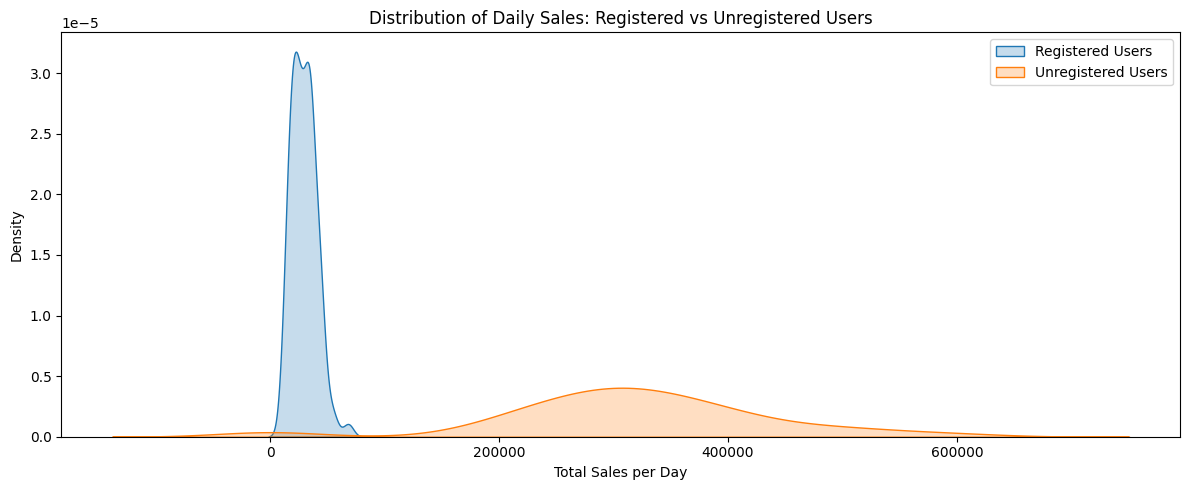

Shapiro Test - Registered: p = 0.007295139880540744
Shapiro Test - Unregistered: p = 0.0012184604855253293

Mann-Whitney U Test: statistic = 352.0, p = 3.8805185465235906e-26
The difference between the samples is statistically significant.


In [ ]:
# sales analysis for each date of registered and unregistered users
from scipy.stats import shapiro, mannwhitneyu
registered = df[df["user_id"].notna()]
unregistered = df[df["user_id"].isna()]
reg_sales = registered.groupby("order_date")["price"].sum().reset_index()
unreg_sales = unregistered.groupby("order_date")["price"].sum().reset_index()
reg_sales.rename(columns={"price": "total_sales"}, inplace=True)
unreg_sales.rename(columns={"price": "total_sales"}, inplace=True)

plt.figure(figsize=(12,5))
sns.kdeplot(reg_sales["total_sales"], label="Registered Users", fill=True)
sns.kdeplot(unreg_sales["total_sales"], label="Unregistered Users", fill=True)
plt.xlabel("Total Sales per Day")
plt.ylabel("Density")
plt.title("Distribution of Daily Sales: Registered vs Unregistered Users")
plt.legend()
plt.tight_layout()
plt.show()

stat_reg, p_reg = shapiro(reg_sales["total_sales"])
stat_unreg, p_unreg = shapiro(unreg_sales["total_sales"])

print(f"Shapiro Test - Registered: p = {p_reg}")
print(f"Shapiro Test - Unregistered: p = {p_unreg}")

stat, p_value = mannwhitneyu(reg_sales["total_sales"], unreg_sales["total_sales"], alternative="two-sided")
print(f"\nMann-Whitney U Test: statistic = {stat}, p = {p_value}")
if p_value < 0.05:
    print("The difference between the samples is statistically significant.")
else:
    print("The difference between the samples is NOT statistically significant.")

In [ ]:
from scipy.stats import chisquare
sessions_by_channel = (df.groupby("traffic_channel")["session_id"].nunique().sort_values(ascending=False))
observed = sessions_by_channel.values
expected = np.repeat(observed.sum() / len(observed), len(observed))
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
print("\nChi-square test results:")
print(f"Chi-square statistic = {chi2_stat}")
print(f"p-value = {p_value}")
alpha = 0.05

if p_value < alpha:
    print("\nConclusion:")
    print("H₀ Reject — there are statistically significant differences in the number of sessions between traffic channels.")
else:
    print("\nВисновок:")
    print("H₀ we do not reject — no statistically significant differences between the channels were found.")


Chi-square test results:
Chi-square statistic = 111705.27557253001
p-value = 0.0

Conclusion:
H₀ Reject — there are statistically significant differences in the number of sessions between traffic channels.


#**Analytical Dashboards**

* [Global Sales Performance Dashboard](https://public.tableau.com/app/profile/mariia.shelest/viz/GlobalSalesPerformanceDashboard_17657112675950/Dashboard1?publish=yes)
* [Session Dashboard](https://public.tableau.com/app/profile/mariia.shelest/viz/SessionOverviewDashboard/Dashboard2)

#**Conclusions**

The company activity analysis showed that it has a stable flow of customers and decent sales volumes. However, sales fluctuate significantly from day to day. Around early December, there was a real boom — almost 674,000
dollars in a single day — while on some days, sales drop to 200,000
dollars. This volatility is somewhat concerning, as it indicates that the business heavily depends on peak periods and possibly on marketing campaigns.

Regarding how people access the site, Chrome clearly leads, which is logical since it is the most popular browser. Interestingly, almost 40% of sales come from mobile devices. This is a good sign, indicating that the mobile version of the site works well and people feel comfortable buying furniture from their smartphones. Tablet sales are very low — only 2% — which may suggest some issues with the tablet version of the site.

The ratio of guests to registered users is quite striking. 92% of people use the site as guests, while only 8% register. This is very low. The registration process may be too complicated, or users are simply not offered enough compelling reasons to create an account.

The geography of sales looks decent. The majority of revenue comes from the Americas — over half of total sales. Canada performs well, and the US does too. Asia contributes a quarter of the revenue, while Europe accounts for around 20%. There is room for growth in Europe and Asia if the company decides to expand more aggressively into these markets. Africa and Oceania currently contribute minimally, which is expected.

The top 10 in-demand product categories are: Sofas & Armchairs, Chairs, Beds, Bookcases & Shelving Units, Cabinets & Cupboards, Outdoor Furniture, Tables & Desks, Chests of Drawers & Drawer Units, Bar Furniture, and Children's Furniture.

*Strengths:*

- Stable traffic flow

- Diversified geography

- Strong position in the North American market

- Well-adapted mobile experience

*Problem areas:*

- Critically low registration rate (8%)

- High seasonality of sales

- Low share of tablet users (2%)

It is recommended to improve marketing, introduce a loyalty program, and create more attractive conditions for registration.